##  Python port of code and figures from the book:

# An Introduction to Bayesian Data Analysis for Cognitive Science  
####  https://vasishth.github.io/bayescogsci/book/
## Chapter 2.
## @ Jozsef Arato, University of Vienna 
jozsef.arato@unvie.ac.at

Import libraries

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats,integrate

Set print precision

In [2]:
%precision 3  

'%.3f'

### 2.2 Deriving the posterior using Bayes’ rule: An analytical example

In [3]:
estimated_means = np.random.binomial(n = 10,p = 0.80, size = 100 ) / 10
np.std(estimated_means)

0.122

In [4]:
theta=np.random.uniform( low=0.3, high=0.8,size=100)

In [7]:
estimated_means = np.random.binomial(n = 10,p = theta, size = 100 ) / 10
np.std(estimated_means)

0.211

### 2.2.2

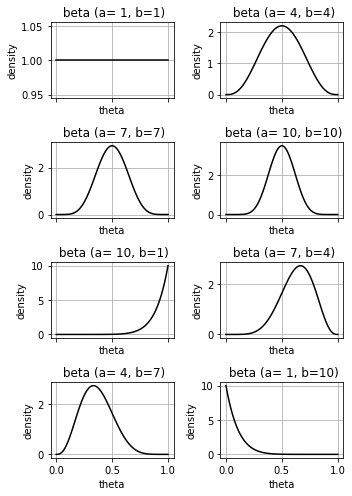

In [9]:
As=[1,4,7,10,10,7,4,1]
Bs=[1,4,7,10,1,4,7,10]
x=np.linspace(0,1,100)
fig,ax=plt.subplots(ncols=2,nrows=4,sharex=True,figsize=(5,7))
ax=ax.flatten()
for cs,ab in enumerate(zip(As,Bs)):
    ax[cs].plot(x,stats.beta.pdf(x,a=ab[0],b=ab[1]),color='k')   
    ax[cs].set_title(f' beta (a= {ab[0]}, b={ab[1]})')
    ax[cs].grid()
    ax[cs].set_ylabel('density')
    ax[cs].set_xlabel('theta')

plt.tight_layout()

In [44]:
stats.beta.ppf([0.025,.975], a=4, b=4)

array([0.184, 0.816])

In [45]:
stats.beta.ppf([0.025,.975], a=10, b=10)

array([0.289, 0.711])

### 2.2.3

In [61]:
def PostFun(theta):
    return theta**84*(1-theta)**24
AUC = integrate.quad(PostFunc, 0, 1) #, args=(theta))
print(AUC[0])


1.424179376737333e-26


In [63]:
def PostFunc(theta):
    return (theta**84*(1-theta)**24)/AUC[0]
AUC2 = integrate.quad(PostFunc2, 0, 1) #, args=(theta))
print(AUC2[0])

0.999999977216369


#### FIGURE 2.2
The (scaled) likelihood, prior, and posterior in the beta-binomial conjugate example. 

note: I did not do any scaling as in the in the book

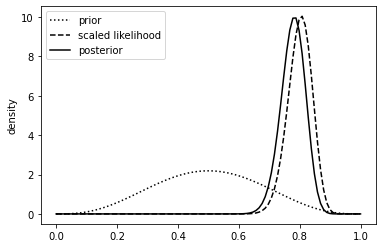

In [74]:
priorcounts=np.array([4,4])
observedc=np.array([80,20])
posteriorc=priorcounts+observedcounts
prior=stats.beta.pdf(x,a=priorcounts[0],b=priorcounts[1])
likelihood=stats.beta.pdf(x,a=observedc[0],b=observedc[1])
posterior=stats.beta.pdf(x,a=posteriorc[0],b=posteriorc[1])

fig,ax=plt.subplots()
ax.plot(x,prior,'k',label='prior',linestyle='dotted')
ax.plot(x,likelihood,'k',label='scaled likelihood',linestyle='--')
ax.plot(x,posterior,'k',label='posterior')
ax.set_ylabel('density')
ax.legend()

In [71]:

stats.beta.ppf([0.025, 0.975],a= 84, b = 24)


array([0.695, 0.851])

#### Figure 2.3: 
The (scaled) likelihood, prior, and posterior in the beta-binomial conjugate example, for different uncertainties in the prior.


note: I did not do any scaling as in in the book

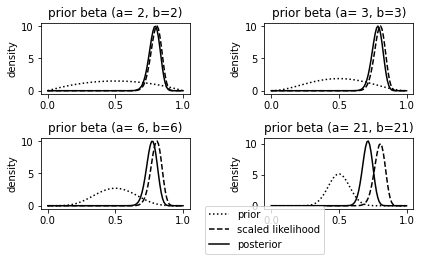

In [93]:
Priors=np.array([2,3,6,21])  # since all priors are symmetric in this case
fig,ax=plt.subplots(ncols=2,nrows=2)
ax=ax.flatten()
for cp,p in enumerate(Priors):
    posteriorc=p+observedcounts
    prior=stats.beta.pdf(x,a=p,b=p)
    posterior=stats.beta.pdf(x,a=posteriorc[0],b=posteriorc[1])
    ax[cp].plot(x,prior,'k',label='prior',linestyle='dotted')
    ax[cp].plot(x,likelihood,'k',label='scaled likelihood',linestyle='--')
    ax[cp].plot(x,posterior,'k',label='posterior')
    ax[cp].set_title(f'prior beta (a= {p}, b={p})')

    ax[cp].set_ylabel('density')
ax[cp].legend(loc='lower center',bbox_to_anchor=(0, -.7))
plt.tight_layout()
#ax.legend(loc='upper center', ,
 #         ncol=3, fancybox=True, shadow=True)